## Basics of networkx (continued)...

In [31]:
import networkx as nx

g = nx.Graph()                   #creates undirected graph
                                 #use nx.DiGraph() for directed grahps

g.add_nodes_from(range(10,20))   #adds nodes in the range given (20 exclusive)
g.add_node(20)                   #adds new node

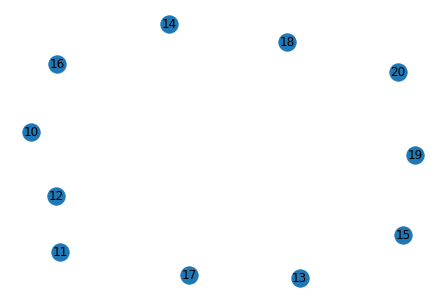

In [32]:
import matplotlib.pyplot as plt
nx.draw(g, with_labels = 1)      #visualize the graph

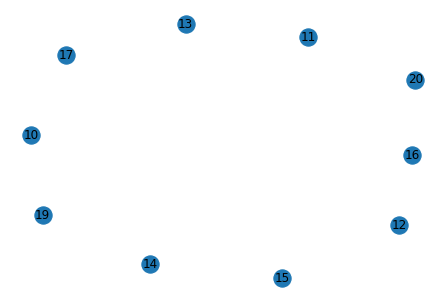

In [33]:
g.remove_node(18)               #removes said node
nx.draw(g, with_labels = 1)

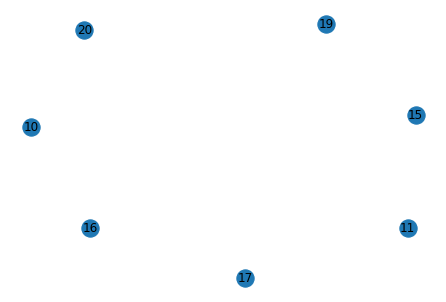

In [34]:
#g.remove_nodes_from([(12,13),(13,14)])  #what's this???
g.remove_nodes_from(range(12,15))#removes nodes in given range(15 exclusive)
nx.draw(g, with_labels = 1)

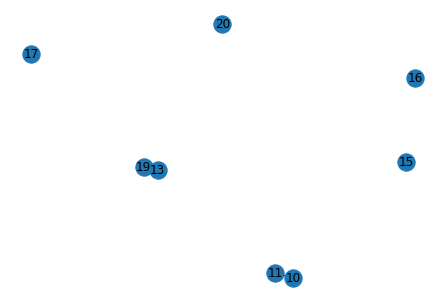

In [35]:
g.add_weighted_edges_from([(10,11,3.0),(13,19,7.5)]) #creates weighted edgess
nx.draw(g, with_labels = 1)

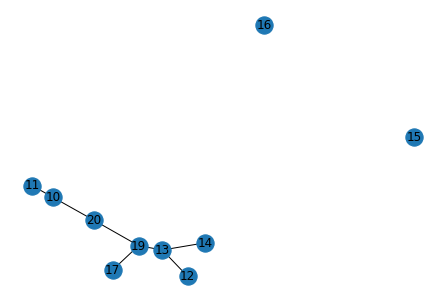

In [36]:
g.add_path([12,13,14])             #creates paths between given  nodes
g.add_path([10,20,19,17])
nx.draw(g, with_labels = 1)

#### Another way to add nodes (from list)

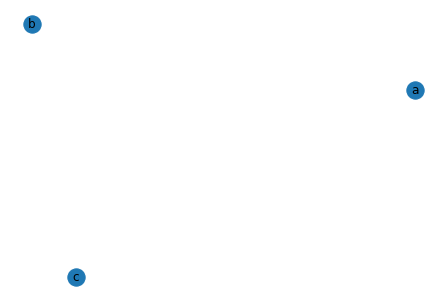

In [40]:
graph = nx.Graph()

listA = [1, 2, 3, 4, 5]
listB = ['a', 'b', 'c']

graph.add_nodes_from(listB)

nx.draw(graph, with_labels = 1)

In [44]:
G = nx.barabasi_albert_graph(50,2) #nx can drawspecific types of graphs

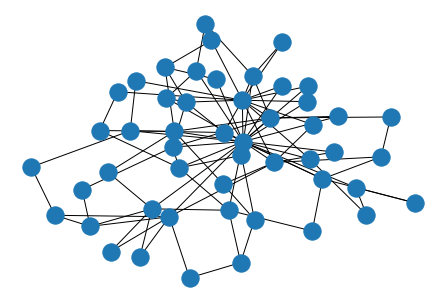

In [50]:
nx.draw_spring(G)       #draws graph with a spring layout (the default should be in spring layout itself)

(array([33., 10.,  5.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 2. ,  3.9,  5.8,  7.7,  9.6, 11.5, 13.4, 15.3, 17.2, 19.1, 21. ]),
 <a list of 10 Patch objects>)

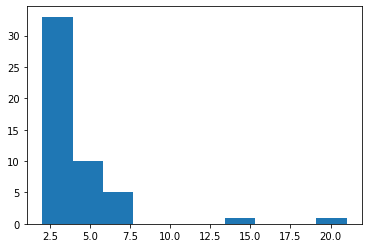

In [55]:
plt.hist([v for k,v in nx.degree(G)])   #plots histogram for num of neighbors each node has
                                        #this graph is highly skewed with one node having more neighbors than any others

In [56]:
nx.diameter(G)                          #prints graph diameter

5

In [57]:
nx.cluster.average_clustering(G)        #not sure

0.2078095238095238

#### Importing from Pandas

In [68]:
import pandas as pd
import numpy as np

nodes = list(range(100))                #create a list of numbers (0-99)

#create a df with 2 rows ('from' & 'to') and 100 columns populated with
#random numbers selected from nodes list (this will be used as the edgelist
# i.e. shows connections between nodes)
df = pd.DataFrame({'from': np.random.choice(nodes, 100), 
                   'to': np.random.choice(nodes, 100)})

In [69]:
df

,from,to
0,38,14
1,49,47
2,34,55
3,34,63
4,29,93
...,...,...
95,75,57
96,35,6
97,88,74
98,56,65


C:\Users\Public\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


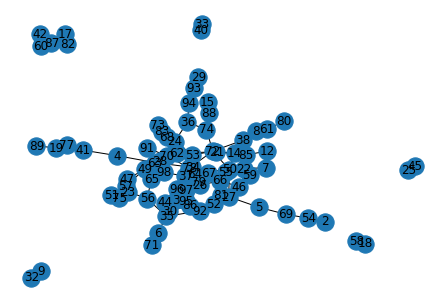

In [70]:
#create graphs with edges randomly created through the df
G = nx.from_pandas_edgelist(df, source='from', target='to')
nx.draw(G, with_labels=1)

(array([30., 20.,  0., 24.,  0.,  5.,  3.,  0.,  2.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

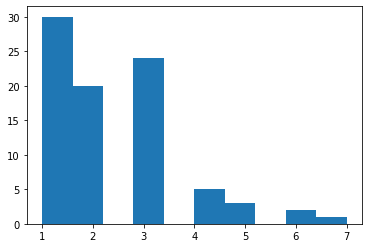

In [72]:
plt.hist([v for k,v in nx.degree(G)])  #much less skewed